# EDA of Titanic dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
%matplotlib inline

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.drop("PassengerId",axis = 1,inplace = True)
df.drop("Cabin",axis = 1,inplace = True)

In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Finding outliers and setting bounds

In [9]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
IQR = q3 - q1
lower_fence = q1 - 1.5 * IQR
upper_fence = q3 + 1.5 * IQR

## Capping the outliers with the fence values

In [10]:
age = np.array(df["Age"])
age2 = []

for i in range(len(age)):
    if age[i] < lower_fence:
        age[i] = lower_fence
        age2.append(age[i])
    elif age[i] > upper_fence:
        age[i] = upper_fence
        age2.append(age[i])
    else:
        age2.append(age[i])
        
df["Age"] = age2

## Replacing sex with 0,1 (females = 1 : males = 0)

In [11]:
sex = df["Sex"]
l1 = []
for val in sex:
    if val == "male":
        l1.append(0)
    elif val == "female":
        l1.append(1)

df["Sex"] = l1

In [12]:
names = df["Name"]
l1 = []

for name in names:
    a = name.split(" ")
    b = ("").join(a)
    l1.append(b)

df["Name"] = l1

name = df["Name"]
len_name = []

for i in name:
    len_1 = len(i)
    len_name.append(len_1)

df["Name_Len"] = len_name

In [13]:
embarked = df["Embarked"]
S = []
C = []
Q = []

for i in range(len(df["Embarked"])):
    S.append(0)
    C.append(0)
    Q.append(0)

for i in range(len(embarked)):
    if embarked[i] == "S":
        S[i] = 1

    elif embarked[i] == "C":
        C[i] = 1

    elif embarked[i] == "Q":
        Q[i] = 1
        
df["Embarked_S"] = S
df["Embarked_C"] = C
df["Embarked_Q"] = Q

<Axes: >

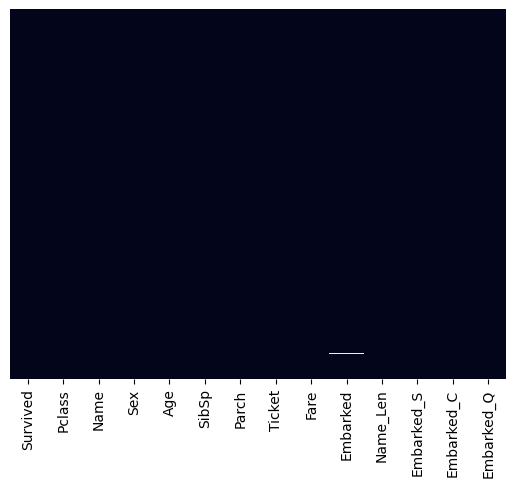

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

## Plotting density graph now

<Axes: ylabel='Density'>

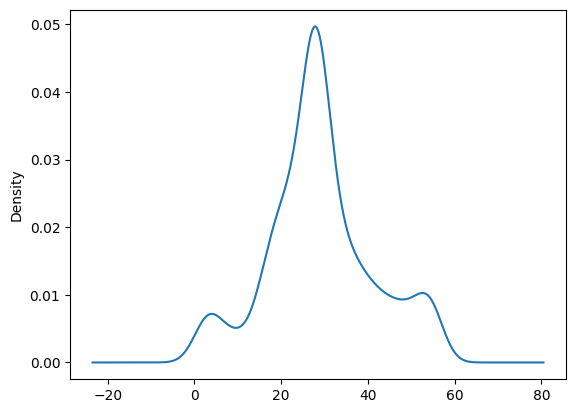

In [15]:
df['Age'].plot(kind = 'density')

<Axes: >

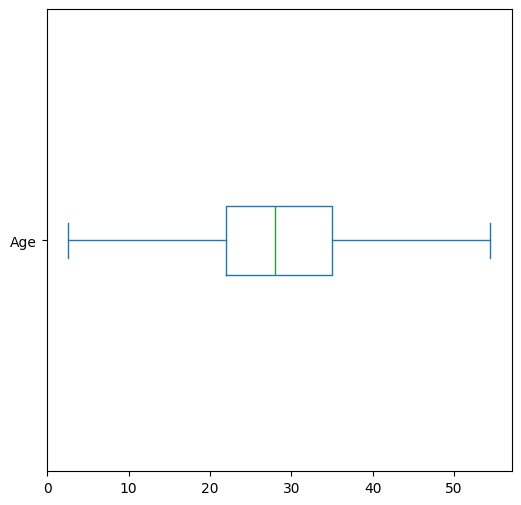

In [16]:
df["Age"].plot(kind = "box", vert = False, figsize = (6,6))

## Analysing the percentage of Live vs Dead people

Text(0.5, 0, 'Alive vs Dead')

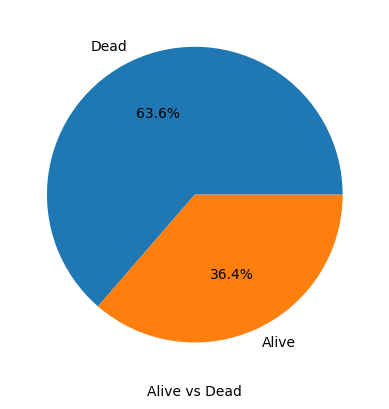

In [17]:
survivors = pd.Series([0]*266 + [1]*152) 
ax = survivors.value_counts().plot(kind = "pie",autopct='%1.1f%%',labels=["Dead", "Alive"])
ax.set_ylabel("")
ax.set_xlabel("Alive vs Dead")

In [18]:
age_group = df["Age"].value_counts()
age_group

Age
28.0    202
54.5     42
24.0     30
22.0     27
18.0     26
       ... 
20.5      1
23.5      1
53.0      1
24.5      1
34.5      1
Name: count, Length: 65, dtype: int64

## Value count of survivors w.r.t age

Text(0.5, 1.0, 'Value count of survivors w.r.t age')

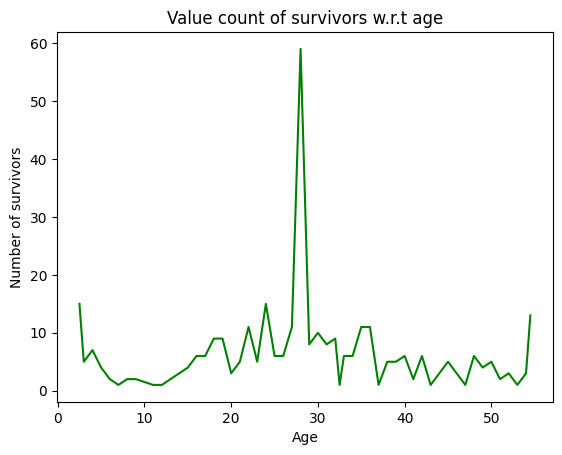

In [19]:
df3 = df[df["Survived"] == 1].groupby("Age")["Survived"].count().plot(color = "green")
df3.set_ylabel("Number of survivors")
plt.title("Value count of survivors w.r.t age")

## Plot of Survivors w.r.t age

Text(0.5, 1.0, 'Age Distribution of Survivors')

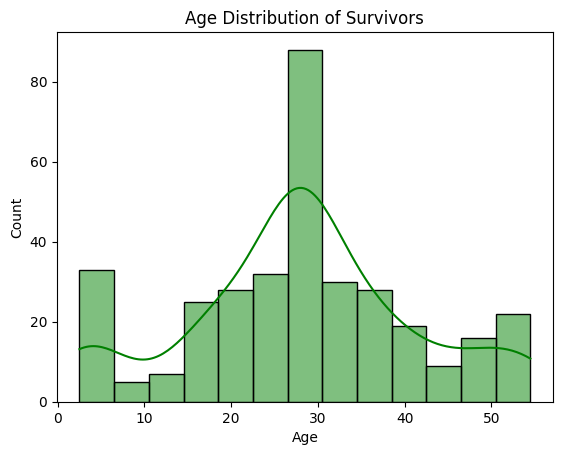

In [20]:
sns.histplot(df[df["Survived"] == 1]["Age"], kde = True, color = "Green")
plt.title('Age Distribution of Survivors')

## Plot of deaths w.r.t age

Text(0.5, 1.0, 'Age Distribution of Non-Survivors')

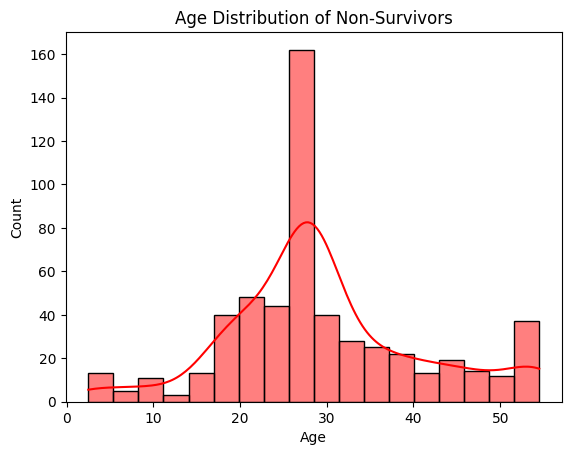

In [21]:
sns.histplot(df[df["Survived"]==0]["Age"], kde = True, color = "Red")
plt.title('Age Distribution of Non-Survivors')

## Survival and gender relationship

In [22]:
df["Sex"].describe()

count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

## Sex distribution of the dataset

Text(0.5, 1.0, 'Male vs Females Boarders')

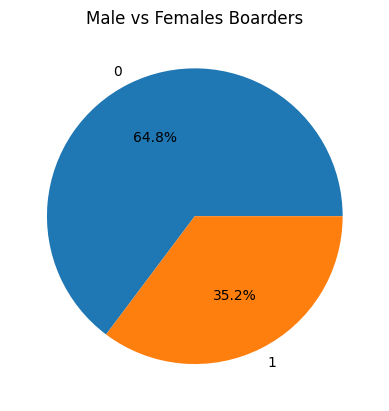

In [23]:
sex_distribution = df["Sex"].value_counts()
ax = sex_distribution.plot(kind ="pie",autopct='%1.1f%%')
ax.set_ylabel("")
plt.title("Male vs Females Boarders")

### 65% Males boarders and 35% Female boarders

In [24]:
survived_gender = df[df["Survived"]== 1]["Sex"]
survived_gender.value_counts()

Sex
1    233
0    109
Name: count, dtype: int64

Text(0.5, 1.0, 'Survival distribution upon sex')

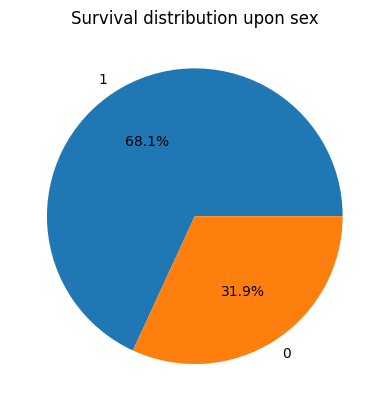

In [25]:
ax = survived_gender.value_counts().plot(kind="pie", autopct='%1.1f%%')
ax.set_ylabel("")
plt.title("Survival distribution upon sex")

### 68% Female boarders and 32% Male boarders survived

Text(0.5, 1.0, 'Gender-wise survivors according to Passenger class')

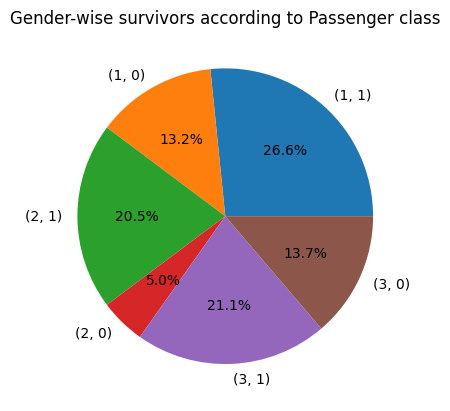

In [26]:
surviving_females_Pclass = df[df["Survived"] == 1].groupby("Pclass")["Sex"].value_counts()
ax = surviving_females_Pclass.plot(kind="pie",autopct = '%1.1f%%' )
ax.set_ylabel("")
plt.title("Gender-wise survivors according to Passenger class")

### Further breakdown of survivors according to class

Text(0.5, 1.0, 'Total Survivors according to Passenger class')

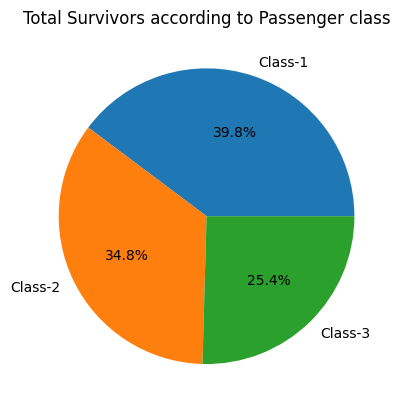

In [27]:
ax = df[df["Survived"]==1]["Pclass"].value_counts().plot(kind = "pie", autopct='%1.1f%%', labels = ["Class-1","Class-2","Class-3"] )
ax.set_ylabel("")
plt.title("Total Survivors according to Passenger class")

### Percentage survivors according to class

In [28]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_Len,Embarked_S,Embarked_C,Embarked_Q
0,0,3,"Braund,Mr.OwenHarris",0,22.0,1,0,A/5 21171,7.2500,S,20,1,0,0
1,1,1,"Cumings,Mrs.JohnBradley(FlorenceBriggsThayer)",1,38.0,1,0,PC 17599,71.2833,C,45,0,1,0
2,1,3,"Heikkinen,Miss.Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,20,1,0,0
3,1,1,"Futrelle,Mrs.JacquesHeath(LilyMayPeel)",1,35.0,1,0,113803,53.1000,S,38,1,0,0
4,0,3,"Allen,Mr.WilliamHenry",0,35.0,0,0,373450,8.0500,S,21,1,0,0


## Comparative graphs of sibling and parent/child w.r.t to survival

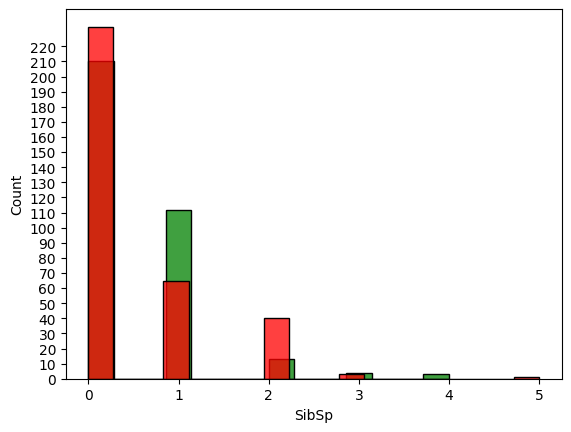

In [29]:
ax = sns.histplot(df[df["Survived"]==1]["SibSp"], color = "green")
ax.set_yticks(range(0, int(max(ax.get_yticks())) + 5, 10))

ax1 = sns.histplot(df[df["Survived"]==1]["Parch"], color = "red")
ax1.set_yticks(range(0, int(max(ax.get_yticks())) + 5, 10))

### Boarders with 0 to 1 child or relatives have greater chances of survival

## Correlation Analysis

In [30]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_Len,Embarked_S,Embarked_C,Embarked_Q
0,0,3,"Braund,Mr.OwenHarris",0,22.0,1,0,A/5 21171,7.2500,S,20,1,0,0
1,1,1,"Cumings,Mrs.JohnBradley(FlorenceBriggsThayer)",1,38.0,1,0,PC 17599,71.2833,C,45,0,1,0
2,1,3,"Heikkinen,Miss.Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,20,1,0,0
3,1,1,"Futrelle,Mrs.JacquesHeath(LilyMayPeel)",1,35.0,1,0,113803,53.1000,S,38,1,0,0
4,0,3,"Allen,Mr.WilliamHenry",0,35.0,0,0,373450,8.0500,S,21,1,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    int64  
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Embarked    889 non-null    object 
 10  Name_Len    891 non-null    int64  
 11  Embarked_S  891 non-null    int64  
 12  Embarked_C  891 non-null    int64  
 13  Embarked_Q  891 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 97.6+ KB


In [32]:
df_corr = df.copy()
df_corr.drop("Embarked", axis = 1, inplace = True)
df_corr.drop("Ticket", axis = 1, inplace = True)
df_corr.drop("Name", axis = 1, inplace = True)

In [33]:
corr = df_corr.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Len,Embarked_S,Embarked_C,Embarked_Q
Survived,1.000000,-0.338481,0.543351,-0.060622,-0.035322,0.081629,0.257307,0.335776,-0.155660,0.168240,0.003650
Pclass,-0.338481,1.000000,-0.131900,-0.340404,0.083081,0.018443,-0.549500,-0.216784,0.081720,-0.243292,0.221009
Sex,0.543351,-0.131900,1.000000,-0.074740,0.114631,0.245489,0.182333,0.453425,-0.125722,0.082853,0.074115
Age,-0.060622,-0.340404,-0.074740,1.000000,-0.239601,-0.178959,0.098703,0.041844,-0.012219,0.031011,-0.035100
SibSp,-0.035322,0.083081,0.114631,-0.239601,1.000000,0.414838,0.159651,0.166387,0.070941,-0.059528,-0.026354
Parch,0.081629,0.018443,0.245489,-0.178959,0.414838,1.000000,0.216225,0.254410,0.063036,-0.011069,-0.081228
Fare,0.257307,-0.549500,0.182333,0.098703,0.159651,0.216225,1.000000,0.154342,-0.166603,0.269335,-0.117216
Name_Len,0.335776,-0.216784,0.453425,0.041844,0.166387,0.254410,0.154342,1.000000,0.060526,0.028142,-0.138132
Embarked_S,-0.155660,0.081720,-0.125722,-0.012219,0.070941,0.063036,-0.166603,0.060526,1.000000,-0.778359,-0.496624
Embarked_C,0.168240,-0.243292,0.082853,0.031011,-0.059528,-0.011069,0.269335,0.028142,-0.778359,1.000000,-0.148258


<Axes: >

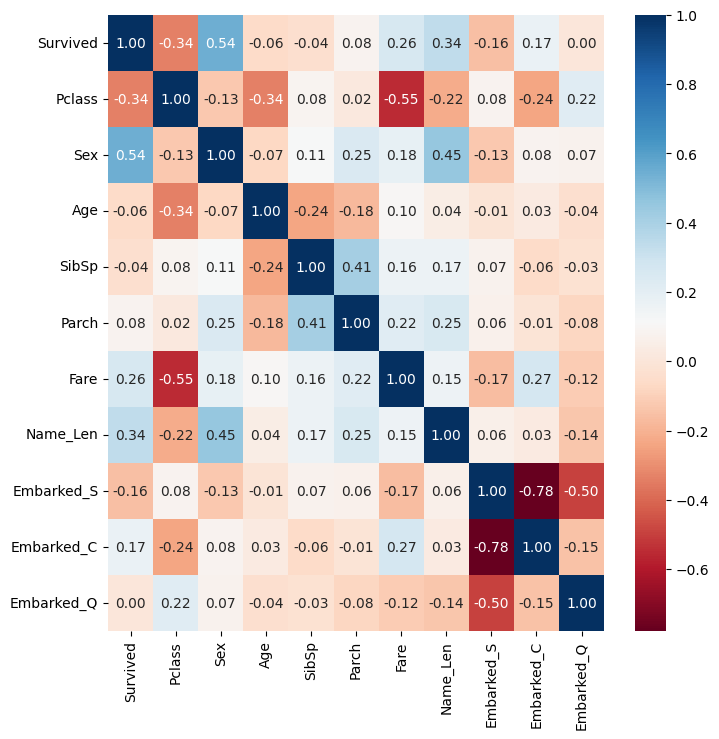

In [34]:
fig = plt.figure(figsize = (8,8))
sns.heatmap(corr, cmap="RdBu", annot=True, fmt=".2f")

### Survival has a significantly positive relationship with sex

In [35]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_Len,Embarked_S,Embarked_C,Embarked_Q
0,0,3,"Braund,Mr.OwenHarris",0,22.0,1,0,A/5 21171,7.2500,S,20,1,0,0
1,1,1,"Cumings,Mrs.JohnBradley(FlorenceBriggsThayer)",1,38.0,1,0,PC 17599,71.2833,C,45,0,1,0
2,1,3,"Heikkinen,Miss.Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,20,1,0,0
3,1,1,"Futrelle,Mrs.JacquesHeath(LilyMayPeel)",1,35.0,1,0,113803,53.1000,S,38,1,0,0
4,0,3,"Allen,Mr.WilliamHenry",0,35.0,0,0,373450,8.0500,S,21,1,0,0


## Analysing groups of passenger class w.r.t fare

In [36]:
group_by_pclass = df_corr.groupby("Pclass")["Fare"]
mean_fare = group_by_pclass.mean()
total_fare = group_by_pclass.sum()

Text(0.5, 1.0, 'Mean fare according to class')

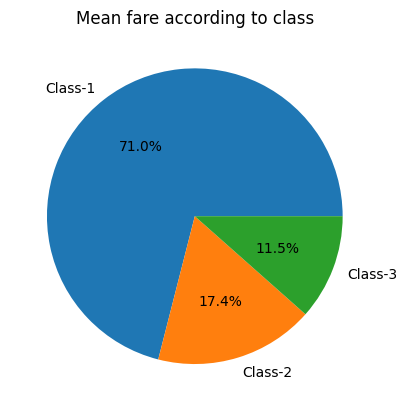

In [37]:
ax = mean_fare.plot(kind = "pie", autopct = '%1.1f%%', labels = ["Class-1","Class-2","Class-3"])
ax.set_ylabel("")
plt.title("Mean fare according to class")

### 71% of the revenue was generated from 1st class followed by 17.4% of 2nd and 11.5% of 1st

In [38]:
group_by_sex = df_corr.groupby("Pclass")["Survived"]

In [39]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_Len,Embarked_S,Embarked_C,Embarked_Q
0,0,3,"Braund,Mr.OwenHarris",0,22.0,1,0,A/5 21171,7.2500,S,20,1,0,0
1,1,1,"Cumings,Mrs.JohnBradley(FlorenceBriggsThayer)",1,38.0,1,0,PC 17599,71.2833,C,45,0,1,0
2,1,3,"Heikkinen,Miss.Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,20,1,0,0
3,1,1,"Futrelle,Mrs.JacquesHeath(LilyMayPeel)",1,35.0,1,0,113803,53.1000,S,38,1,0,0
4,0,3,"Allen,Mr.WilliamHenry",0,35.0,0,0,373450,8.0500,S,21,1,0,0


In [40]:
df2 = df[df["Survived"] == 1].groupby("Pclass")["Sex"].value_counts().sum()
survival_rate = (df2 / 891) * 100
survival_rate

np.float64(38.38383838383838)

### Survival Rate = 38.4%

Text(0.5, 1.0, 'Dead vs Alive embarked from C')

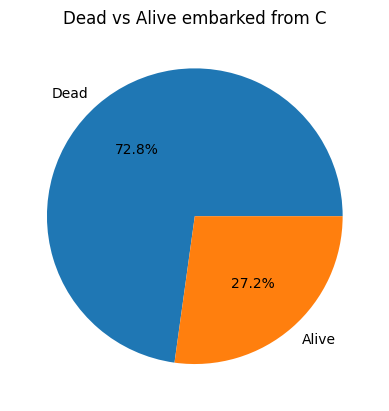

In [62]:
ax = df[df["Survived"]==1]["Embarked_C"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", labels = ["Dead","Alive"])
ax.set_ylabel('')
plt.title("Dead vs Alive embarked from C")

Text(0.5, 1.0, 'Dead vs Alive embarked from Q')

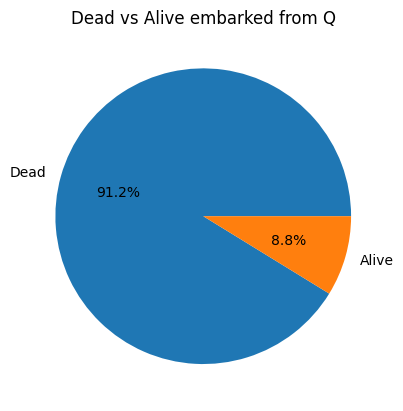

In [63]:
ax = df[df["Survived"]==1]["Embarked_Q"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", labels = ["Dead","Alive"])
ax.set_ylabel('')
plt.title("Dead vs Alive embarked from Q")

Text(0.5, 1.0, 'Dead vs Alive embarked from S')

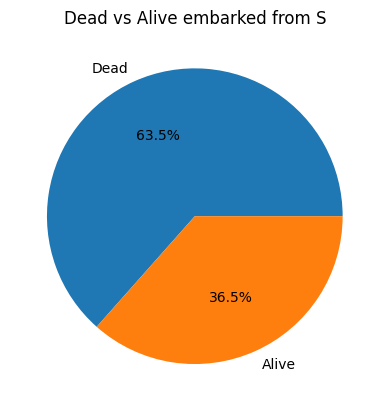

In [66]:
ax = df[df["Survived"]==1]["Embarked_S"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", labels = ["Dead","Alive"])
ax.set_ylabel('')
plt.title("Dead vs Alive embarked from S")

## People embarked from S had the most chances 